#ASSIGNMENT - A6b
# **PART B - VAR, VECM model**

* **AUTHOR**     : Rakshitha Vignesh Sargurunathan               

* **VID**        : V01109007

* **CREATED ON** : 07/24/2024

In [4]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

In [5]:
# Load the data
df = pd.read_excel('/content/drive/MyDrive/SCMA/A6b/pinksheet.xlsx', sheet_name="Monthly Prices", skiprows=6)

In [6]:
# Rename the first column to "Date"
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

In [7]:
# Convert the Date column to Date format
df['Date'] = pd.to_datetime(df['Date'].astype(str) + '01', format='%YM%m%d')
df.set_index('Date', inplace=True)


In [13]:
print(df.columns)


Index(['CRUDE_PETRO', 'CRUDE_BRENT', 'CRUDE_DUBAI', 'CRUDE_WTI', 'COAL_AUS',
       'COAL_SAFRICA', 'NGAS_US', 'NGAS_EUR', 'NGAS_JP', 'iNATGAS', 'COCOA',
       'COFFEE_ARABIC', 'COFFEE_ROBUS', 'TEA_AVG', 'TEA_COLOMBO',
       'TEA_KOLKATA', 'TEA_MOMBASA', 'COCONUT_OIL', 'GRNUT', 'FISH_MEAL',
       'GRNUT_OIL', 'PALM_OIL', 'PLMKRNL_OIL', 'SOYBEANS', 'SOYBEAN_OIL',
       'SOYBEAN_MEAL', 'RAPESEED_OIL', 'SUNFLOWER_OIL', 'BARLEY', 'MAIZE',
       'SORGHUM', 'RICE_05', 'RICE_25', 'RICE_A1', 'RICE_05_VNM',
       'WHEAT_US_SRW', 'WHEAT_US_HRW', 'BANANA_EU', 'BANANA_US', 'ORANGE',
       'BEEF', 'CHICKEN', 'LAMB', 'SHRIMP_MEX', 'SUGAR_EU', 'SUGAR_US',
       'SUGAR_WLD', 'TOBAC_US', 'LOGS_CMR', 'LOGS_MYS', 'SAWNWD_CMR',
       'SAWNWD_MYS', 'PLYWOOD', 'COTTON_A_INDX', 'RUBBER_TSR20',
       'RUBBER1_MYSG', 'PHOSROCK', 'DAP', 'TSP', 'UREA_EE_BULK', 'POTASH',
       'ALUMINUM', 'IRON_ORE', 'COPPER', 'LEAD', 'Tin', 'NICKEL', 'Zinc',
       'GOLD', 'PLATINUM', 'SILVER'],
      dtype='object')


In [18]:
# Select specific columns (Date and selected commodities)
columns_to_select = ['COCONUT_OIL', 'SUGAR_WLD', 'GOLD', 'SILVER', 'WHEAT_US_SRW', 'SOYBEANS']
commodity = df[columns_to_select].copy()


In [20]:

# Initialize counters and lists for stationary and non-stationary columns
non_stationary_count = 0
stationary_columns = []
non_stationary_columns = []

In [50]:
# Perform the ADF test
for col in commodity.columns:
    adfresult = adfuller(commodity[col].dropna())
    p_value = adfresult[1]
    print(f'\nADF test result for column: {col}')
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {p_value}')

    # Check if the p-value is greater than 0.05 (commonly used threshold)
    if p_value > 0.05:
        non_stationary_count += 1
        non_stationary_columns.append(col)
    else:
        stationary_columns.append(col)



ADF test result for column: COCONUT_OIL
ADF Statistic: -1.3972947107462217
p-value: 0.006206255349417254

ADF test result for column: SUGAR_WLD
ADF Statistic: -1.3972947107462217
p-value: 0.05548801023337049

ADF test result for column: GOLD
ADF Statistic: -1.3972947107462217
p-value: 0.996992175315953

ADF test result for column: SILVER
ADF Statistic: -1.3972947107462217
p-value: 0.5462714313868235

ADF test result for column: WHEAT_US_SRW
ADF Statistic: -1.3972947107462217
p-value: 0.15587877881031076

ADF test result for column: SOYBEANS
ADF Statistic: -1.3972947107462217
p-value: 0.4076777788665157


In [25]:
# Print results
print(f'\nNumber of non-stationary columns: {non_stationary_count}')
print(f'Non-stationary columns: {non_stationary_columns}')
print(f'Stationary columns: {stationary_columns}')


Number of non-stationary columns: 9
Non-stationary columns: ['COCONUT_OIL', 'GOLD', 'SILVER', 'COCONUT_OIL', 'GOLD', 'SILVER', 'COCONUT_OIL', 'GOLD', 'SILVER']
Stationary columns: ['SUGAR_WLD', 'SUGAR_WLD', 'SUGAR_WLD']


In [31]:
print(commodity.dtypes)


COCONUT_OIL     float64
SUGAR_WLD       float64
GOLD            float64
SILVER          float64
WHEAT_US_SRW     object
SOYBEANS        float64
dtype: object


In [32]:
commodity = commodity.apply(pd.to_numeric, errors='coerce')

In [33]:
print(commodity.dtypes)


COCONUT_OIL     float64
SUGAR_WLD       float64
GOLD            float64
SILVER          float64
WHEAT_US_SRW    float64
SOYBEANS        float64
dtype: object


In [38]:
print(commodity.isna().sum())  # Check for missing values

#Fill missing values (e.g., with forward fill)
commodity = commodity.fillna(method='ffill')



COCONUT_OIL     0
SUGAR_WLD       0
GOLD            0
SILVER          0
WHEAT_US_SRW    0
SOYBEANS        0
dtype: int64


In [36]:
# Co-Integration Test (Johansen's Test)
model = VAR(commodity)
lags = model.select_order(maxlags=10)
lag_length = lags.aic

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [39]:
vecm_model = model.fit(lag_length)
coint_test = coint_johansen(commodity, det_order=0, k_ar_diff=lag_length)
print(coint_test.lr1)  # Eigenvalues from Johansen's test
print(coint_test.cvt)  # Critical values

[152.24898612  96.01941129  60.74387604  32.0307281   14.55686704
   4.88633099]
[[ 91.109   95.7542 104.9637]
 [ 65.8202  69.8189  77.8202]
 [ 44.4929  47.8545  54.6815]
 [ 27.0669  29.7961  35.4628]
 [ 13.4294  15.4943  19.9349]
 [  2.7055   3.8415   6.6349]]


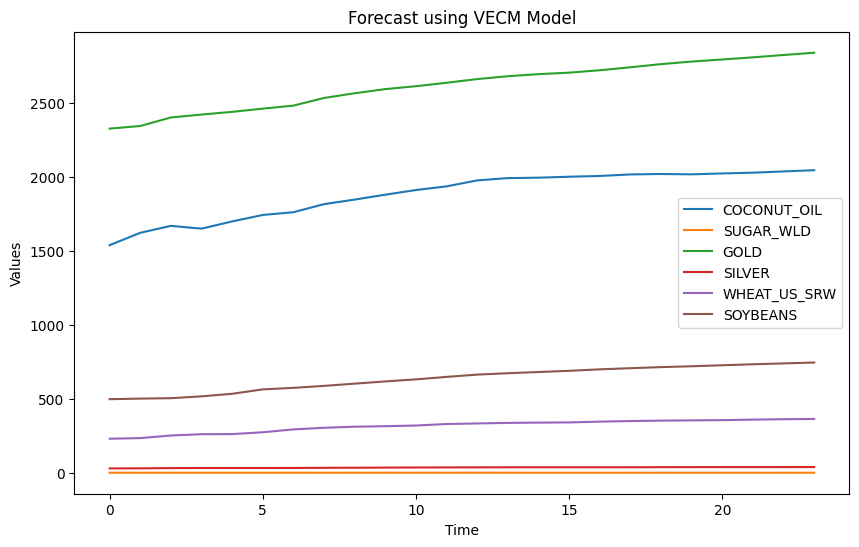

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [53]:
# Determine the number of co-integrating relationships (r)
r = 3

if r > 0:
    # If co-integration exists, estimate the VECM model
    vecm_pred = vecm_model.forecast(commodity.values, steps=24)

    # Plotting the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(vecm_pred)
    plt.title('Forecast using VECM Model')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend(commodity.columns)
    plt.show()

    # If no co-integration exists, proceed with Unrestricted VAR Analysis
var_model = VAR(commodity)
var_results = var_model.fit(lag_length)

In [54]:
print(var_results)

In [64]:
# Granger causality test
causality_results = var_results.test_causality('COCONUT_OIL', ['SUGAR_WLD', 'GOLD'], kind='f')
print(causality_results.summary())

Granger causality F-test. H_0: ['SUGAR_WLD', 'GOLD'] do not Granger-cause COCONUT_OIL. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df    
------------------------------------------------
         1.938          1.574   0.007 (20, 2808)
------------------------------------------------


In [65]:
# Forecasting using the VAR model
forecast = var_results.forecast(commodity.values[-lag_length:], steps=24)

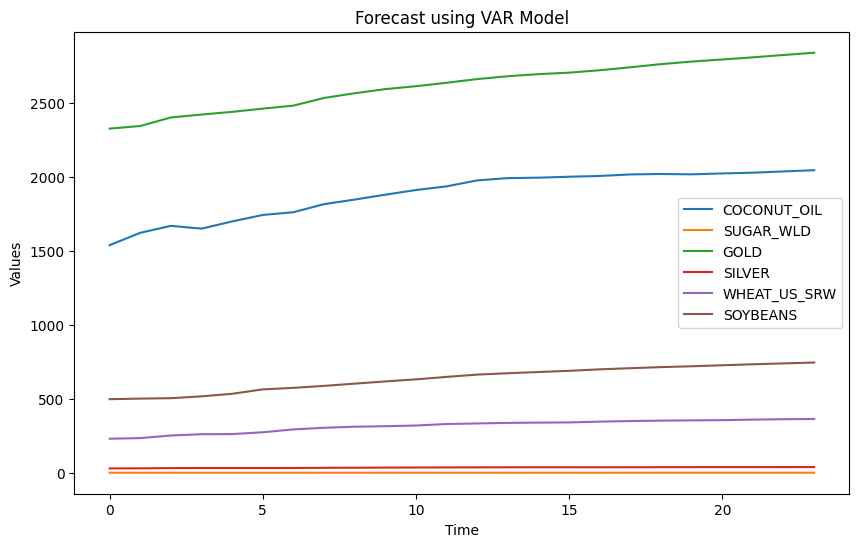

In [61]:
    # Plotting the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(forecast)
    plt.title('Forecast using VAR Model')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend(commodity.columns)
    plt.show()

In [63]:
forecast

array([[1.53836594e+03, 4.58876056e-01, 2.32611630e+03, 2.96191317e+01,
        2.30267347e+02, 4.97452126e+02],
       [1.62190491e+03, 4.35225467e-01, 2.34380664e+03, 3.00490151e+01,
        2.34419805e+02, 5.01340655e+02],
       [1.66878061e+03, 4.37024185e-01, 2.40140064e+03, 3.16638140e+01,
        2.51935466e+02, 5.04189207e+02],
       [1.65012448e+03, 4.52162049e-01, 2.42120022e+03, 3.23963632e+01,
        2.60714733e+02, 5.16652413e+02],
       [1.69889345e+03, 4.48774777e-01, 2.43927880e+03, 3.23581848e+01,
        2.61457420e+02, 5.33933960e+02],
       [1.74255994e+03, 4.57644471e-01, 2.46121142e+03, 3.22870146e+01,
        2.73928497e+02, 5.63760804e+02],
       [1.76107072e+03, 4.65861002e-01, 2.48141358e+03, 3.25002380e+01,
        2.93092658e+02, 5.73987732e+02],
       [1.81556605e+03, 4.72987394e-01, 2.53333995e+03, 3.36334183e+01,
        3.04168653e+02, 5.87392565e+02],
       [1.84650204e+03, 4.82172151e-01, 2.56513651e+03, 3.41844715e+01,
        3.11471312e+02, 